# Data Clean Up and Exploratory Data Analysis

The main goal of this notebook is to get a global view of the four dataset we found. In order to get as much useful information as possible, we will then merge the four dataset and get one clean data. In the later work, the clean dataset will be the only dataset we use. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Explore the first dataset

In [3]:
# data1 comes from https://www.kaggle.com/sooaaib/walt-disney-movies?select=disney_movies.csv
# read data1
data1 = pd.read_csv('./data1.csv', error_bad_lines=False)
print('size of the first dataset is ', data1.shape)
data1.head()

size of the first dataset is  (437, 36)


,Unnamed: 0,title,Production company,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),...,Narrated by,Cinematography,Edited by,Screenplay by,Production companies,Japanese,Hepburn,Adaptation by,Traditional,Simplified
0,0,Academy Award Review of,Walt Disney Productions,"['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,$45.472,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Snow White and the Seven Dwarfs,Walt Disney Productions,"['December 21, 1937 ( Carthay Circle Theatre ,...",83 minutes,United States,English,$418 million,83.0,1490000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pinocchio,Walt Disney Productions,"['February 7, 1940 ( Center Theatre )', 'Febru...",88 minutes,United States,English,$164 million,88.0,2600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fantasia,Walt Disney Productions,"['November 13, 1940']",126 minutes,United States,English,$76.4–$83.3 million,126.0,2280000.0,...,Deems Taylor,James Wong Howe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,The Reluctant Dragon,Walt Disney Productions,"['June 20, 1941']",74 minutes,United States,English,"$960,000 (worldwide rentals)",74.0,600000.0,...,NaN,Bert Giennon,Paul Weatherwax,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Number of unique films: ", len(data1.title.unique()))
print("Number of unique release date: ", len(data1['Release date'].unique()))

Number of unique films:  424
Number of unique release date:  433


Among the 437 films, unique films take up 424, but the unique number of release date is different. Therefore, we deduce that there may be films that are remade.

In [5]:
data1['title'].value_counts()

The Jungle Book      2
Cinderella           2
Dumbo                2
The Shaggy Dog       2
Pete's Dragon        2
                    ..
Chimpanzee           1
The Aristocats       1
Meet the Deedles     1
Run, Cougar, Run     1
Monkeys, Go Home!    1
Name: title, Length: 424, dtype: int64

In [6]:
data1.loc[data1['title'] == 'Freaky Friday']

,Unnamed: 0,title,Production company,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),...,Narrated by,Cinematography,Edited by,Screenplay by,Production companies,Japanese,Hepburn,Adaptation by,Traditional,Simplified
127,127,Freaky Friday,Walt Disney Productions,"['December 17, 1976']",95 minutes,United States,English,$36 million,95.0,5000000.0,...,NaN,Charles F. Wheeler,Cotton Warburton,Mary Rodgers,NaN,NaN,NaN,NaN,NaN,NaN
265,265,Freaky Friday,"['Walt Disney Pictures', 'Gunn Films']","['August 4, 2003 ( Los Angeles )', 'August 6, ...",97 minutes,United States,English,$160.8 million,97.0,26000000.0,...,NaN,Oliver Wood,Bruce Green,"['Heather Hach', 'Leslie Dixon']",NaN,NaN,NaN,NaN,NaN,NaN


We first consider different versions of the same film as different ones. There are 36 features in total in data1, but we are interested in only part of those features, select the useful features.

In [7]:
list(data1.columns)

['Unnamed: 0',
 'title',
 'Production company',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Box office',
 'Running time (int)',
 'Budget (float)',
 'Box office (float)',
 'Release date (datetime)',
 'imdb_rating',
 'imdb_votes',
 'imdb_id',
 'metascore',
 'rotten_tomatoes',
 'Directed by',
 'Produced by',
 'Written by',
 'Based on',
 'Starring',
 'Music by',
 'Distributed by',
 'Budget',
 'Story by',
 'Narrated by',
 'Cinematography',
 'Edited by',
 'Screenplay by',
 'Production companies',
 'Japanese',
 'Hepburn',
 'Adaptation by',
 'Traditional',
 'Simplified']

In [8]:
# select the features are useful to our project
data1_select = data1[['title',
 'Running time (int)',
 'Budget (float)',
 'Box office (float)',
 'Release date (datetime)',
 'imdb_rating',
 'metascore',
 'rotten_tomatoes',
 'Directed by',
 'Produced by',
 'Music by',
 'Distributed by']].rename(columns={'Running time (int)': 'Running time', 
                                    'Budget (float)': 'Budget',
                                    'Box office (float)': 'Box office',
                                    'Release date (datetime)': 'Release date',
                                    'imdb_rating': 'imdb'})
data1_select.head()

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
0,Academy Award Review of,41.0,NaN,4.547200e+01,1937-05-19,7.2,7.2,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,83.0,1490000.0,4.180000e+08,1937-12-21,7.6,7.6,NaN,"['David Hand (supervising)', 'William Cottrell...",Walt Disney,"['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures
2,Pinocchio,88.0,2600000.0,1.640000e+08,1940-02-07,7.4,7.4,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures
3,Fantasia,126.0,2280000.0,8.330000e+07,1940-11-13,7.8,7.8,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",See program,"['Walt Disney Productions', 'RKO Radio Pictures']"
4,The Reluctant Dragon,74.0,600000.0,9.600000e+05,1941-06-20,6.9,6.9,67%,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,"['Frank Churchill', 'Larry Morey']",RKO Radio Pictures


## Explore the second dataset

In [9]:
# read data2 from https://www.kaggle.com/dikshabhati2002/walt-disney-movies
data2 = pd.read_csv('./data2.csv', error_bad_lines=False)
print('size of the second dataset is ', data2.shape)
data2.head()

size of the second dataset is  (444, 21)


,Unnamed: 0,title,Production company,Country,Language,Running time,Budget,Box office,Release date,imdb,...,rotten_tomatoes,Directed by,Produced by,Based on,Starring,Music by,Distributed by,Cinematography,Edited by,Screenplay by
0,0,Academy Award Review of,Walt Disney Productions,United States,English,41.0,NaN,4.547200e+01,1937-05-19,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Snow White and the Seven Dwarfs,Walt Disney Productions,United States,English,83.0,1490000.0,4.180000e+08,1937-12-21,7.6,...,NaN,"['David Hand (supervising)', 'William Cottrell...",Walt Disney,"['Snow White', 'by The', 'Brothers Grimm']","['Adriana Caselotti', 'Lucille La Verne', 'Har...","['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures,NaN,NaN,NaN
2,2,Pinocchio,Walt Disney Productions,United States,English,88.0,2600000.0,1.640000e+08,1940-02-07,7.4,...,73%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['The Adventures of Pinocchio', 'by', 'Carlo C...","['Cliff Edwards', 'Dickie Jones', 'Christian R...","['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,NaN,NaN,NaN
3,3,Fantasia,Walt Disney Productions,United States,English,126.0,2280000.0,8.330000e+07,1940-11-13,7.7,...,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",NaN,"['Leopold Stokowski', 'Deems Taylor']",See program,RKO Radio Pictures,James Wong Howe,NaN,NaN
4,4,The Reluctant Dragon,Walt Disney Productions,United States,English,74.0,600000.0,9.600000e+05,1941-06-20,6.9,...,68%,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,NaN,"['Robert Benchley', 'Frances Gifford', 'Buddy ...","['Frank Churchill', 'Larry Morey']",RKO Radio Pictures,Bert Giennon,Paul Weatherwax,NaN


In [10]:
print("Number of unique films: ", len(data2.title.unique()))
print("Number of unique release date: ", len(data2['Release date'].unique()))
data1['title'].value_counts()

Number of unique films:  431
Number of unique release date:  430


The Jungle Book      2
Cinderella           2
Dumbo                2
The Shaggy Dog       2
Pete's Dragon        2
                    ..
Chimpanzee           1
The Aristocats       1
Meet the Deedles     1
Run, Cougar, Run     1
Monkeys, Go Home!    1
Name: title, Length: 424, dtype: int64

In [11]:
data2.loc[data2['title'] == 'Freaky Friday']

,Unnamed: 0,title,Production company,Country,Language,Running time,Budget,Box office,Release date,imdb,...,rotten_tomatoes,Directed by,Produced by,Based on,Starring,Music by,Distributed by,Cinematography,Edited by,Screenplay by
127,127,Freaky Friday,Walt Disney Productions,United States,English,95.0,5000000.0,36000000.0,1976-12-20,6.2,...,88%,Gary Nelson,Ron Miller,"['Freaky Friday', 'by Mary Rodgers']","['Jodie Foster', 'Barbara Harris', 'John Astin']",Johnny Mandel,Buena Vista Distribution,Charles F. Wheeler,Cotton Warburton,Mary Rodgers
265,265,Freaky Friday,"['Walt Disney Pictures', 'Gunn Films']",United States,English,97.0,26000000.0,160800000.0,2003-08-04,6.2,...,88%,Mark Waters,Andrew Gunn,"['Freaky Friday', 'by', 'Mary Rodgers']","['Jamie Lee Curtis', 'Lindsay Lohan', 'Harold ...",Rolfe Kent,Buena Vista Pictures,Oliver Wood,Bruce Green,"['Heather Hach', 'Leslie Dixon']"


In [12]:
list(data2.columns)

['Unnamed: 0',
 'title',
 'Production company',
 'Country',
 'Language',
 'Running time',
 'Budget',
 'Box office',
 'Release date',
 'imdb',
 'metascore',
 'rotten_tomatoes',
 'Directed by',
 'Produced by',
 'Based on',
 'Starring',
 'Music by',
 'Distributed by',
 'Cinematography',
 'Edited by',
 'Screenplay by']

In [13]:
# select features
data2_select = data2[['title',
 'Running time',
 'Budget',
 'Box office',
 'Release date',
 'imdb',
 'metascore',
 'rotten_tomatoes',
 'Directed by',
 'Produced by',
 'Music by',
 'Distributed by']]
data2_select.head()

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
0,Academy Award Review of,41.0,NaN,4.547200e+01,1937-05-19,7.2,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,83.0,1490000.0,4.180000e+08,1937-12-21,7.6,95.0,NaN,"['David Hand (supervising)', 'William Cottrell...",Walt Disney,"['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures
2,Pinocchio,88.0,2600000.0,1.640000e+08,1940-02-07,7.4,99.0,73%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures
3,Fantasia,126.0,2280000.0,8.330000e+07,1940-11-13,7.7,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",See program,RKO Radio Pictures
4,The Reluctant Dragon,74.0,600000.0,9.600000e+05,1941-06-20,6.9,NaN,68%,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,"['Frank Churchill', 'Larry Morey']",RKO Radio Pictures


## Explore the third dataset

In [14]:
# read data3 from https://www.kaggle.com/therealsampat/disney-movies-dataset
data3 = pd.read_csv('./data3.csv', error_bad_lines=False)
print('size of the third dataset is ', data3.shape)
data3.head()

size of the third dataset is  (432, 32)


,Unnamed: 0,title,Production company,Release date,Running time,Country,Language,Running time (int),Budget (float),Box office (float),...,Box office,Story by,Narrated by,Cinematography,Edited by,Screenplay by,Production companies,Adaptation by,Traditional,Simplified
0,0,Academy Award Review of,Walt Disney Productions,"['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,41.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Snow White and the Seven Dwarfs,Walt Disney Productions,"['December 21, 1937 ( Carthay Circle Theatre ,...",83 minutes,United States,English,83.0,1490000.0,418000000.0,...,$418 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pinocchio,Walt Disney Productions,"['February 7, 1940 ( Center Theatre )', 'Febru...",88 minutes,United States,English,88.0,2600000.0,164000000.0,...,$164 million,"['Ted Sears', 'Otto Englander', 'Webb Smith', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fantasia,Walt Disney Productions,"['November 13, 1940']",126 minutes,United States,English,126.0,2280000.0,83300000.0,...,$76.4–$83.3 million,"['Joe Grant', 'Dick Huemer']",Deems Taylor,James Wong Howe,NaN,NaN,NaN,NaN,NaN,NaN
4,4,The Reluctant Dragon,Walt Disney Productions,"['June 20, 1941']",74 minutes,United States,English,74.0,600000.0,960000.0,...,"$960,000 (worldwide rentals)",NaN,NaN,Bert Giennon,Paul Weatherwax,NaN,NaN,NaN,NaN,NaN


In [15]:
list(data3.columns)

['Unnamed: 0',
 'title',
 'Production company',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Running time (int)',
 'Budget (float)',
 'Box office (float)',
 'Release date (datetime)',
 'imdb',
 'metascore',
 'rotten_tomatoes',
 'Directed by',
 'Produced by',
 'Written by',
 'Based on',
 'Starring',
 'Music by',
 'Distributed by',
 'Budget',
 'Box office',
 'Story by',
 'Narrated by',
 'Cinematography',
 'Edited by',
 'Screenplay by',
 'Production companies',
 'Adaptation by',
 'Traditional',
 'Simplified']

In [16]:
# select features
data3_select = data3[['title',
 'Running time (int)',
 'Budget (float)',
 'Box office (float)',
 'Release date (datetime)',
 'imdb',
 'metascore',
 'rotten_tomatoes',
 'Directed by',
 'Produced by',
 'Music by',
 'Distributed by',]].rename(columns={'Running time (int)': 'Running time', 
                                    'Budget (float)': 'Budget',
                                    'Box office (float)': 'Box office',
                                    'Release date (datetime)': 'Release date'})
data3_select.head()

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
0,Academy Award Review of,41.0,NaN,NaN,1937-05-19,7.2,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,83.0,1490000.0,418000000.0,1937-12-21,7.6,95.0,NaN,"['David Hand (supervising)', 'William Cottrell...",Walt Disney,"['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures
2,Pinocchio,88.0,2600000.0,164000000.0,1940-02-07,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures
3,Fantasia,126.0,2280000.0,83300000.0,1940-11-13,7.8,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",See program,"['Walt Disney Productions', 'RKO Radio Pictures']"
4,The Reluctant Dragon,74.0,600000.0,960000.0,1941-06-20,6.9,NaN,67%,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,"['Frank Churchill', 'Larry Morey']",RKO Radio Pictures


## Merge the selected dataset

We wish to get as many useful data as possible, therefore we merge the three dataset and get the final dataset. In the later part of this project, we will make use of the final dataset only.

In [17]:
data_temp = data1_select.append(data2_select, ignore_index=True)

# drop duplicated movies by title and releasse date
data_temp.drop_duplicates(subset =['title', 'Release date'], keep = 'last', inplace = True)
data_temp = data_temp.reset_index(drop=True)

In [18]:
data_final = data_temp.append(data3_select, ignore_index=True)

# drop duplicated movies by title and releasse date
data_final.drop_duplicates(subset =['title', 'Release date'], keep = 'last', inplace = True)
data_final = data_final.reset_index(drop=True)

In [19]:
# reorder films based on release date
data_final = data_final.sort_values(by='Release date', ascending=1)
data_final = data_final.reset_index(drop=True)
data_final

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
0,Academy Award Review of,41.0,NaN,NaN,1937-05-19,7.2,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,83.0,1490000.0,4.180000e+08,1937-12-21,7.6,95.0,NaN,"['David Hand (supervising)', 'William Cottrell...",Walt Disney,"['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures
2,Pinocchio,88.0,2600000.0,1.640000e+08,1940-02-07,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures
3,Fantasia,126.0,2280000.0,8.330000e+07,1940-11-13,7.8,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",See program,"['Walt Disney Productions', 'RKO Radio Pictures']"
4,The Reluctant Dragon,74.0,600000.0,9.600000e+05,1941-06-20,6.9,NaN,67%,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,"['Frank Churchill', 'Larry Morey']",RKO Radio Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
471,Night at the Museum,306.0,387000000.0,1.310000e+09,NaN,6.4,48.0,43%,Shawn Levy,"['Shawn Levy', 'Chris Columbus', 'Michael Barn...",Alan Silvestri,"['20th Century Studios', 'Disney+']"
472,The Straight Story,112.0,10000000.0,6.200000e+06,NaN,8.0,86.0,95%,David Lynch,"['Mary Sweeney', 'Neal Edelstein', 'Alain Sarde']",Angelo Badalamenti,"['Buena Vista Pictures', '(United States)', 'F..."
473,Lilly the Witch: The Dragon and the Magic Book,NaN,NaN,NaN,NaN,5.2,NaN,27%,Stefan Ruzowitzky,NaN,Ian Honeyman,NaN
474,Walt & El Grupo,NaN,NaN,NaN,NaN,6.3,55.0,59%,Theodore Thomas,NaN,NaN,Walt Disney Studios Motion Pictures


In [20]:
# count null value for each column
data_final.isnull().sum(axis = 0)

title                0
Running time        19
Budget             186
Box office         105
Release date        29
imdb                26
metascore          162
rotten_tomatoes     87
Directed by          1
Produced by         12
Music by            12
Distributed by       3
dtype: int64

As one can see, for the final dataset we get, there are many empty cells. We keep only the films with non-na value for the visualization purpose. But we allow the cells for Directed by, Produced by, Music by and Distributed by to be null value.

In [21]:
data_final = data_final[data_final['Running time'].notna()]
data_final = data_final[data_final['Budget'].notna()]
data_final = data_final[data_final['Box office'].notna()]
data_final = data_final[data_final['Release date'].notna()]
data_final = data_final[data_final['imdb'].notna()]
data_final = data_final[data_final['metascore'].notna()]
data_final = data_final[data_final['rotten_tomatoes'].notna()]

data_final = data_final.reset_index(drop=True)
data_final

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
0,Pinocchio,88.0,2600000.0,1.640000e+08,1940-02-07,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures
1,Fantasia,126.0,2280000.0,8.330000e+07,1940-11-13,7.8,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",See program,"['Walt Disney Productions', 'RKO Radio Pictures']"
2,Dumbo,64.0,950000.0,1.300000e+06,1941-10-23,7.2,96.0,98%,"['Supervising director:', 'Ben Sharpsteen', 'S...",Walt Disney,"['Frank Churchill', 'Oliver Wallace']",RKO Radio Pictures
3,Bambi,70.0,858000.0,2.674000e+08,1942-08-09,7.3,91.0,90%,"['Supervising director', 'David Hand', 'Sequen...",Walt Disney,"['Frank Churchill', 'Edward H. Plumb']",RKO Radio Pictures
4,Make Mine Music,75.0,1350000.0,3.275000e+06,1946-04-20,6.3,60.0,70%,"['Jack Kinney', 'Clyde Geronimi', 'Hamilton Lu...",Walt Disney,"['Eliot Daniel', 'Ken Darby', 'Charles Wolcott...","RKO Radio Pictures, Inc."
...,...,...,...,...,...,...,...,...,...,...,...,...
219,The Lion King,118.0,250000000.0,1.657000e+09,2019-07-09,8.5,88.0,93%,Jon Favreau,"['Jon Favreau', 'Jeffrey Silver', 'Karen Gilch...",Hans Zimmer,"['Walt Disney Studios', 'Motion Pictures']"
220,Maleficent: Mistress of Evil,119.0,185000000.0,4.917000e+08,2019-10-18,6.6,43.0,40%,Joachim Rønning,"['Joe Roth', 'Angelina Jolie', 'Duncan Henders...",Geoff Zanelli,"['Walt Disney Studios', 'Motion Pictures']"
221,Frozen II,103.0,150000000.0,1.450000e+09,2019-11-07,6.9,64.0,77%,"['Chris Buck', 'Jennifer Lee']",Peter Del Vecho,"['Christophe Beck', 'Robert Lopez', 'Kristen A...","['Walt Disney Studios', 'Motion Pictures']"
222,Onward,102.0,175000000.0,1.364000e+08,2020-02-21,7.4,61.0,88%,Dan Scanlon,Kori Rae,"['Mychael Danna', 'Jeff Danna']","['Walt Disney Studios', 'Motion Pictures']"


## Running time distribution

In [22]:
print("The averge running time of disney movie is ", data_final['Running time'].mean()) 

# get shortest films
data_final.loc[data_final['Running time'] == data_final['Running time'].min()]

The averge running time of disney movie is  99.25446428571429


,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
125,Roving Mars,40.0,1000000.0,11000000.0,2006-01-27,7.2,58.0,71%,George Butler,"['George Butler', 'Frank Marshall']","['Philip Glass', 'Sigur Rós']",Buena Vista Pictures


In [23]:
# get longest films
data_final.loc[data_final['Running time'] == data_final['Running time'].max()]

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
134,Pirates of the Caribbean: At World's End,168.0,300000000.0,961000000.0,2007-05-19,7.1,50.0,44%,Gore Verbinski,Jerry Bruckheimer,Hans Zimmer,Buena Vista Pictures


Text(0.5, 1.0, 'Running Time Distribution')

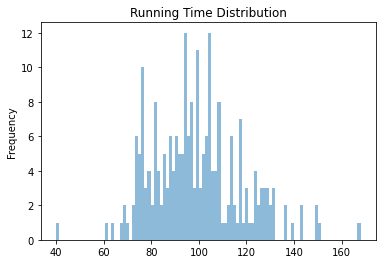

In [24]:
ax = data_final['Running time'].plot.hist(bins=100, alpha=0.5)
ax.set_title("Running Time Distribution")

Most disney movies are within 2 hours.

## Budget and Box Office

In [25]:
# get the film with the least investment
data_final.loc[data_final['Budget'] == data_final['Budget'].min()]

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
158,Prince of Persia: The Sands of Time,116.0,150.0,336400000.0,2010-05-09,6.6,50.0,37%,Mike Newell,Jerry Bruckheimer,Harry Gregson-Williams,"['Walt Disney Studios', 'Motion Pictures']"


In [26]:
# get the film with the most investment
data_final.loc[data_final['Budget'] == data_final['Budget'].max()]

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
169,Pirates of the Caribbean: On Stranger Tides,137.0,410600000.0,1.046000e+09,2011-05-07,6.6,45.0,33%,Rob Marshall,"Jerry Bruckheimer , Neal H. Moritz",Hans Zimmer,"['Walt Disney Studios', 'Motion Pictures']"


In [27]:
# get the film with the least box office
data_final.loc[data_final['Box office'] == data_final['Box office'].min()]

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
28,Pete's Dragon,128.0,10000000.0,36.0,1977-11-03,6.7,71.0,88%,Don Chaffey,"['Jerome Courtland', 'Ron W. Miller']",Irwin Kostal,Buena Vista Distribution


In [28]:
# get the film with the most box office
data_final.loc[data_final['Box office'] == data_final['Box office'].max()]

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by
219,The Lion King,118.0,250000000.0,1.657000e+09,2019-07-09,8.5,88.0,93%,Jon Favreau,"['Jon Favreau', 'Jeffrey Silver', 'Karen Gilch...",Hans Zimmer,"['Walt Disney Studios', 'Motion Pictures']"


Text(0.5, 1.0, 'Budget Distribution')

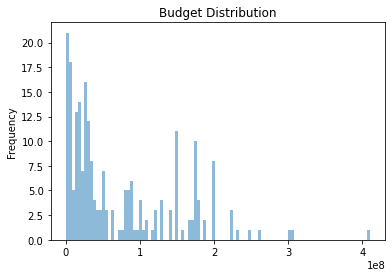

In [29]:
ax = data_final['Budget'].plot.hist(bins=100, alpha=0.5)
ax.set_title("Budget Distribution")

Text(0.5, 1.0, 'Budget Distribution')

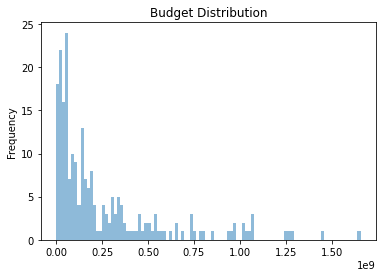

In [30]:
ax = data_final['Box office'].plot.hist(bins=100, alpha=0.5)
ax.set_title("Budget Distribution")

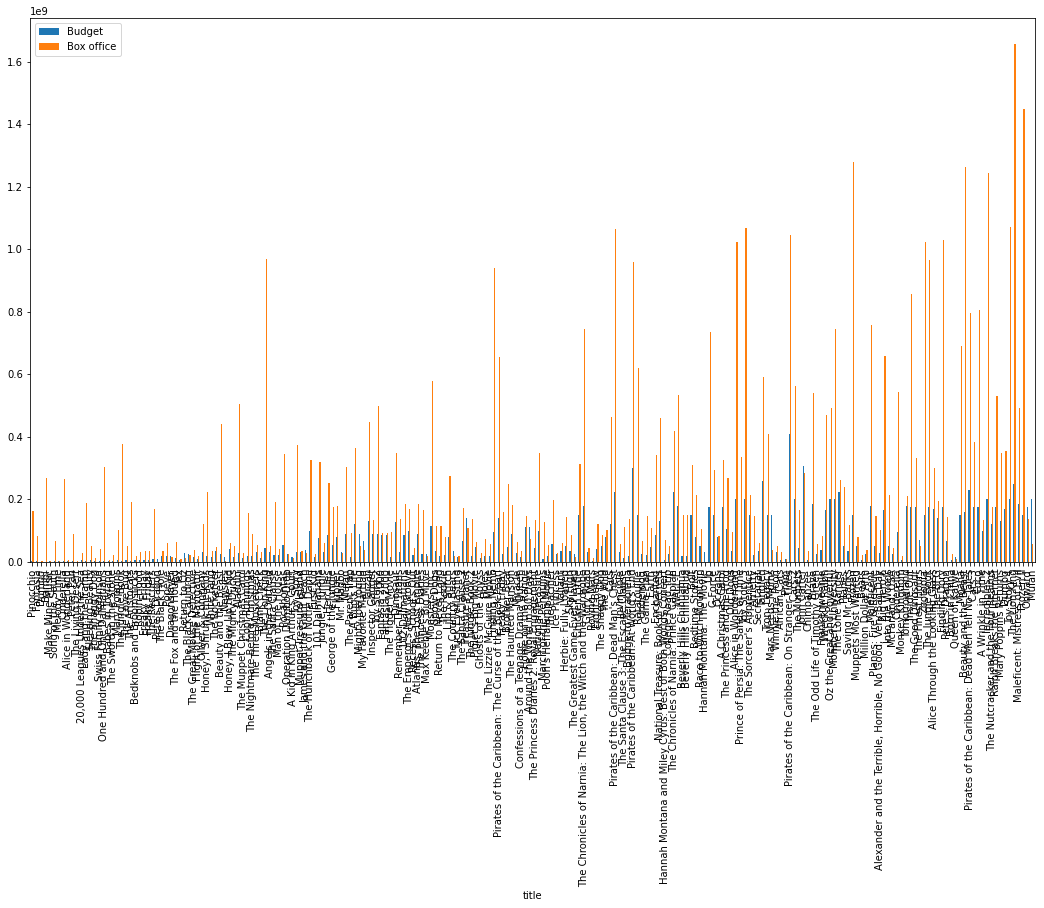

In [31]:
ax = data_final.plot.bar(x='title', y=['Budget','Box office'], figsize=(18,10))

The films are arranged in time sequence, which means for the x-axis, the films on the right side are released more recently. We can observe a rough increase of the box office through time. However, for the most recent movies like Onward and Mulan, the values box office are less than the values of budget. Since these two are released in 2020, it may caused by the Covid-19 situation.

## Year

We wish to draw the timeline of Disney movies. In this section, we will observe for each year, how many Disney movies are released.

In [32]:
from datetime import datetime
data_final['year'] = data_final['Release date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
data_final.head()

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by,year
0,Pinocchio,88.0,2600000.0,164000000.0,1940-02-07,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,1940
1,Fantasia,126.0,2280000.0,83300000.0,1940-11-13,7.8,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",See program,"['Walt Disney Productions', 'RKO Radio Pictures']",1940
2,Dumbo,64.0,950000.0,1300000.0,1941-10-23,7.2,96.0,98%,"['Supervising director:', 'Ben Sharpsteen', 'S...",Walt Disney,"['Frank Churchill', 'Oliver Wallace']",RKO Radio Pictures,1941
3,Bambi,70.0,858000.0,267400000.0,1942-08-09,7.3,91.0,90%,"['Supervising director', 'David Hand', 'Sequen...",Walt Disney,"['Frank Churchill', 'Edward H. Plumb']",RKO Radio Pictures,1942
4,Make Mine Music,75.0,1350000.0,3275000.0,1946-04-20,6.3,60.0,70%,"['Jack Kinney', 'Clyde Geronimi', 'Hamilton Lu...",Walt Disney,"['Eliot Daniel', 'Ken Darby', 'Charles Wolcott...","RKO Radio Pictures, Inc.",1946


Text(0.5, 1.0, 'Yearly Released Movies')

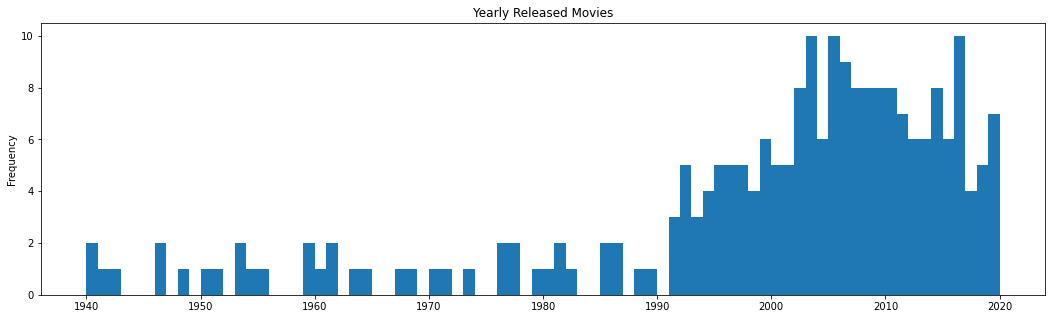

In [33]:
# year range: [1940, 2020] 80 years
ax = data_final['year'].plot.hist(bins=80, figsize=(18,5))
ax.set_title("Yearly Released Movies")

<AxesSubplot:xlabel='year'>

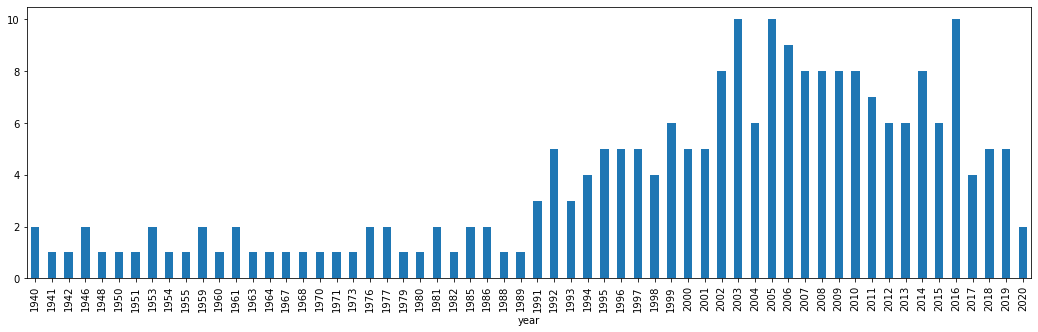

In [34]:
data_final.groupby(['year']).count()['title'].plot.bar(figsize=(18,5))

Start from year 1992, there is a increase of released Disney movie per year.

## Ratings

In [35]:
# inspect the highest ratings by imdb
data_final.sort_values(by='imdb', ascending=0).head(5)

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by,year
52,The Lion King,88.0,45000000.0,9.685000e+08,1994-06-15,8.5,88.0,93%,"['Roger Allers', 'Rob Minkoff']",Don Hahn,Hans Zimmer,Buena Vista Pictures,1994
219,The Lion King,118.0,250000000.0,1.657000e+09,2019-07-09,8.5,88.0,93%,Jon Favreau,"['Jon Favreau', 'Jeffrey Silver', 'Karen Gilch...",Hans Zimmer,"['Walt Disney Studios', 'Motion Pictures']",2019
211,Coco,105.0,175000000.0,8.071000e+08,2017-10-20,8.4,81.0,97%,Lee Unkrich,Darla K. Anderson,Michael Giacchino,"['Walt Disney Studios', 'Motion Pictures']",2017
144,WALL-E,97.0,180000000.0,5.333000e+08,2008-06-23,8.4,95.0,95%,Andrew Stanton,Jim Morris,Thomas Newman,Walt Disney Studios Motion Pictures,2008
59,Toy Story,81.0,30000000.0,3.736000e+08,1995-11-19,8.3,95.0,100%,John Lasseter,"['Bonnie Arnold', 'Ralph Guggenheim']",Randy Newman,Buena Vista Pictures Distribution,1995


In [36]:
# inspect the highest ratings by metascore
data_final.sort_values(by='metascore', ascending=0).head()

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by,year
0,Pinocchio,88.0,2600000.0,164000000.0,1940-02-07,7.4,99.0,100%,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,1940
2,Dumbo,64.0,950000.0,1300000.0,1941-10-23,7.2,96.0,98%,"['Supervising director:', 'Ben Sharpsteen', 'S...",Walt Disney,"['Frank Churchill', 'Oliver Wallace']",RKO Radio Pictures,1941
135,Ratatouille,111.0,150000000.0,620700000.0,2007-06-22,8.0,96.0,96%,Brad Bird,Brad Lewis,Michael Giacchino,Buena Vista Pictures Distribution,2007
217,Dumbo,112.0,170000000.0,353300000.0,2019-03-11,7.2,96.0,98%,Tim Burton,"['Justin Springer', 'Ehren Kruger', 'Katterli ...",Danny Elfman,"['Walt Disney Studios', 'Motion Pictures']",2019
1,Fantasia,126.0,2280000.0,83300000.0,1940-11-13,7.8,96.0,95%,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",See program,"['Walt Disney Productions', 'RKO Radio Pictures']",1940


In [37]:
# inspect the highest ratings by rotten_tomatoes
data_final.sort_values(by='rotten_tomatoes', ascending=0).head()

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by,year
103,Finding Nemo,100.0,94000000.0,940300000.0,2003-05-30,8.1,90.0,99%,Andrew Stanton,Graham Walters,Thomas Newman,Buena Vista Pictures Distribution,2003
16,One Hundred and One Dalmatians,79.0,3600000.0,303000000.0,1961-01-25,7.2,83.0,98%,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...",Walt Disney,George Bruns,Buena Vista Pictures Distribution,1961
2,Dumbo,64.0,950000.0,1300000.0,1941-10-23,7.2,96.0,98%,"['Supervising director:', 'Ben Sharpsteen', 'S...",Walt Disney,"['Frank Churchill', 'Oliver Wallace']",RKO Radio Pictures,1941
217,Dumbo,112.0,170000000.0,353300000.0,2019-03-11,7.2,96.0,98%,Tim Burton,"['Justin Springer', 'Ehren Kruger', 'Katterli ...",Danny Elfman,"['Walt Disney Studios', 'Motion Pictures']",2019
196,Inside Out,94.0,175000000.0,858000000.0,2015-05-18,8.1,94.0,98%,Pete Docter,Jonas Rivera,Michael Giacchino,"['Walt Disney Studios', 'Motion Pictures']",2015


Text(0.5, 1.0, 'Ratings imdb Distribution')

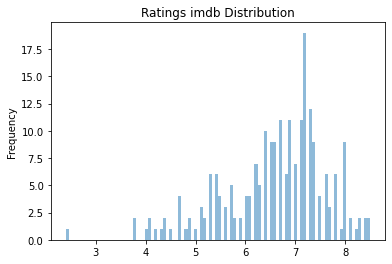

In [38]:
ax = data_final['imdb'].plot.hist(bins=100, alpha=0.5)
ax.set_title("Ratings imdb Distribution")

Text(0.5, 1.0, 'Ratings metascore Distribution')

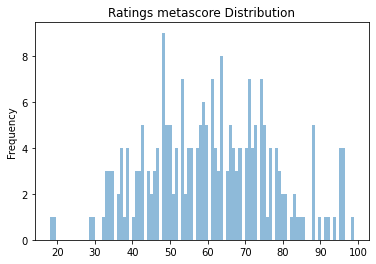

In [39]:
ax = data_final['metascore'].plot.hist(bins=100, alpha=0.5)
ax.set_title("Ratings metascore Distribution")

In [40]:
# transfer percentage to number
data_final['rotten_tomatoes'] = data_final['rotten_tomatoes'].apply(lambda x: int(x[0:-1]))

Text(0.5, 0, ' in %')

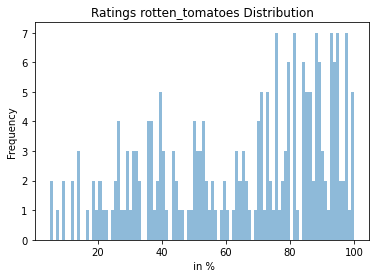

In [41]:
ax = data_final['rotten_tomatoes'].plot.hist(bins=100, alpha=0.5)
ax.set_title("Ratings rotten_tomatoes Distribution")
ax.set_xlabel(" in %")

In [42]:
data_final.head()

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by,year
0,Pinocchio,88.0,2600000.0,164000000.0,1940-02-07,7.4,99.0,100,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,1940
1,Fantasia,126.0,2280000.0,83300000.0,1940-11-13,7.8,96.0,95,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",See program,"['Walt Disney Productions', 'RKO Radio Pictures']",1940
2,Dumbo,64.0,950000.0,1300000.0,1941-10-23,7.2,96.0,98,"['Supervising director:', 'Ben Sharpsteen', 'S...",Walt Disney,"['Frank Churchill', 'Oliver Wallace']",RKO Radio Pictures,1941
3,Bambi,70.0,858000.0,267400000.0,1942-08-09,7.3,91.0,90,"['Supervising director', 'David Hand', 'Sequen...",Walt Disney,"['Frank Churchill', 'Edward H. Plumb']",RKO Radio Pictures,1942
4,Make Mine Music,75.0,1350000.0,3275000.0,1946-04-20,6.3,60.0,70,"['Jack Kinney', 'Clyde Geronimi', 'Hamilton Lu...",Walt Disney,"['Eliot Daniel', 'Ken Darby', 'Charles Wolcott...","RKO Radio Pictures, Inc.",1946


In [44]:
data_final.to_csv("full_data.csv")

## About People (Director, Producer...)

In [45]:
data_final.head()

,title,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes,Directed by,Produced by,Music by,Distributed by,year
0,Pinocchio,88.0,2600000.0,164000000.0,1940-02-07,7.4,99.0,100,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,1940
1,Fantasia,126.0,2280000.0,83300000.0,1940-11-13,7.8,96.0,95,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",See program,"['Walt Disney Productions', 'RKO Radio Pictures']",1940
2,Dumbo,64.0,950000.0,1300000.0,1941-10-23,7.2,96.0,98,"['Supervising director:', 'Ben Sharpsteen', 'S...",Walt Disney,"['Frank Churchill', 'Oliver Wallace']",RKO Radio Pictures,1941
3,Bambi,70.0,858000.0,267400000.0,1942-08-09,7.3,91.0,90,"['Supervising director', 'David Hand', 'Sequen...",Walt Disney,"['Frank Churchill', 'Edward H. Plumb']",RKO Radio Pictures,1942
4,Make Mine Music,75.0,1350000.0,3275000.0,1946-04-20,6.3,60.0,70,"['Jack Kinney', 'Clyde Geronimi', 'Hamilton Lu...",Walt Disney,"['Eliot Daniel', 'Ken Darby', 'Charles Wolcott...","RKO Radio Pictures, Inc.",1946


In [59]:
def get_name_count(string, dic):
    if(string == 'nan'):
        return dic
    # if the string is with []
    #print(string)
    if('[' in string and ']' in string):
        # get rid of the []
        string = string[1:-1]
        
    names = string.split(', ')
    for name in names:
        # if name string with ''
        if('\'' in name):
            name = name[1:-1]
        # get rid of '(' or ')' or '(blahblahblah)' as they are all explaination
        if(name.startswith('(')):
            continue
        if(name.startswith(')')):
            continue
            
        if name in dic:
            dic[name] += 1
        else:
            dic[name] = 1
            
    return dic

In [60]:
directors = {}
producers = {}
music_by = {}
distributed_by = {}

for ind, row in data_final.iterrows():
    if(pd.notna(row['Directed by'])):
        directors = get_name_count(row['Directed by'],directors)
    if(pd.notna(row['Produced by'])):
        producers = get_name_count(row['Produced by'],producers)
    if(pd.notna(row['Music by'])):
        music_by = get_name_count(row['Music by'],music_by)
    if(pd.notna(row['Distributed by'])):
        distributed_by = get_name_count(row['Distributed by'],distributed_by)

In [61]:
directors = {k: v for k, v in sorted(directors.items(), key=lambda item: item[1])}
producers = {k: v for k, v in sorted(producers.items(), key=lambda item: item[1])}
music_by = {k: v for k, v in sorted(music_by.items(), key=lambda item: item[1])}
distributed_by = {k: v for k, v in sorted(distributed_by.items(), key=lambda item: item[1])}

In [62]:
directors

{'David D. Hand': 1,
 'Jim Handley': 1,
 'Ford Beebe': 1,
 'Supervising director:': 1,
 'Sequence directors:': 1,
 'Supervising director': 1,
 'David Hand': 1,
 'Sequence directors': 1,
 'Graham Heid': 1,
 'Norman Wright': 1,
 'Joshua Meador': 1,
 'Robert Cormack': 1,
 'Live action:': 1,
 'Harve Foster': 1,
 'Animation:': 1,
 'Richard Fleischer': 1,
 'Clyde Geronimi (supervising)': 1,
 'Eric Larson': 1,
 'Les Clark': 1,
 'Charles Barton': 1,
 'John McKimson': 1,
 'Ken Annakin': 1,
 'Jack Donohue': 1,
 'John Lounsbery': 1,
 'Don Chaffey': 1,
 'Robert Altman': 1,
 'Matthew Robbins': 1,
 'Tim Hunter': 1,
 'Walter Murch': 1,
 'Burny Mattinson': 1,
 'Dave Michener': 1,
 'George Scribner': 1,
 'Kenny Ortega': 1,
 'Rupert Wainwright': 1,
 'Roger Allers': 1,
 'William Dear': 1,
 'James Orr': 1,
 'Mike Gabriel': 1,
 'Simon Wincer': 1,
 'Michael Gottlieb': 1,
 'David M. Evans': 1,
 'Sam Weisman': 1,
 'Les Mayfield': 1,
 'Stanley Tong': 1,
 'Barry Cook': 1,
 'Tony Bancroft': 1,
 'Nancy Meyers': 1

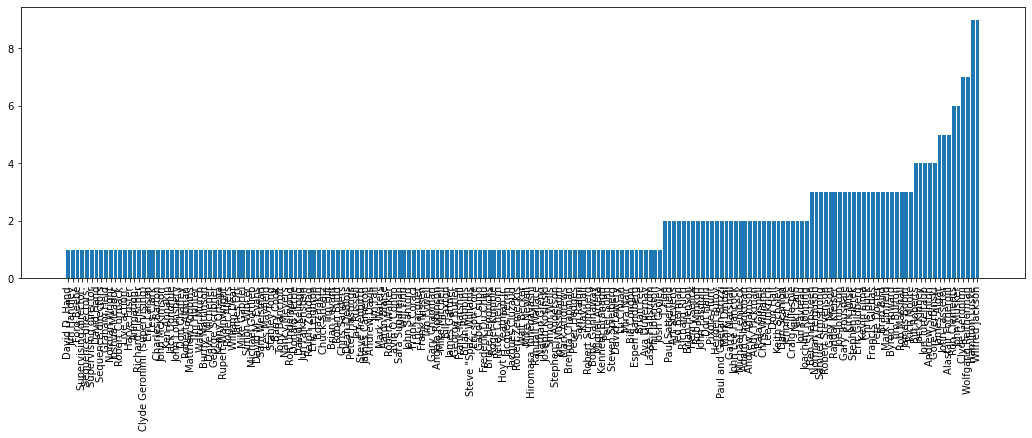

In [63]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(range(len(directors)), list(directors.values()))
plt.xticks(range(len(directors)), list(directors.keys()), rotation=90)
plt.show()

Hamilton Luske and Wilfred Jackson are the directors of with the most disney movies, which is 9 respectively.

In [64]:
producers

{'Bill Anderson': 1,
 'Basil Keys': 1,
 'Winston Hibler': 1,
 'Jerome Courtland': 1,
 'Robert Evans': 1,
 'Hal Barwood': 1,
 'Howard W. Koch': 1,
 'Art Stevens': 1,
 'Tim Zinnemann': 1,
 'Paul Maslansky': 1,
 'Joe Hale': 1,
 'Burny Mattinson': 1,
 'Dimitri Villard': 1,
 'Robert Wald': 1,
 'Penney Finkelman Cox': 1,
 'Markay Powell': 1,
 'Charles Gordon': 1,
 'Lawrence Gordon': 1,
 'Lloyd Levin': 1,
 'Michael Finnell': 1,
 'Susan B. Landau': 1,
 'Jeffrey Bydalek': 1,
 'Gary Adelson': 1,
 'Craig Baumgarten': 1,
 'Tony Shimkin': 1,
 'Irby Smith': 1,
 'Bonnie Bruckheimer': 1,
 'Marty Katz': 1,
 'Jim Pentecost': 1,
 'Diane Nabatoff': 1,
 'David Madden': 1,
 'J.P. Guerin': 1,
 'Ralph Guggenheim': 1,
 'Richard Baker': 1,
 'Brad Krevoy': 1,
 'Alice Dewey': 1,
 'Ben Myron': 1,
 'Pam Coats': 1,
 'Charles Shyer': 1,
 'Ted Hartley': 1,
 'Tom Jacobson': 1,
 'Marc Toberoff': 1,
 'Andy Heyward': 1,
 'Aaron Meyerson': 1,
 'Helene Plotkin': 1,
 'Karen Robert Jackson': 1,
 'Roy E. Disney': 1,
 'Cheryl A

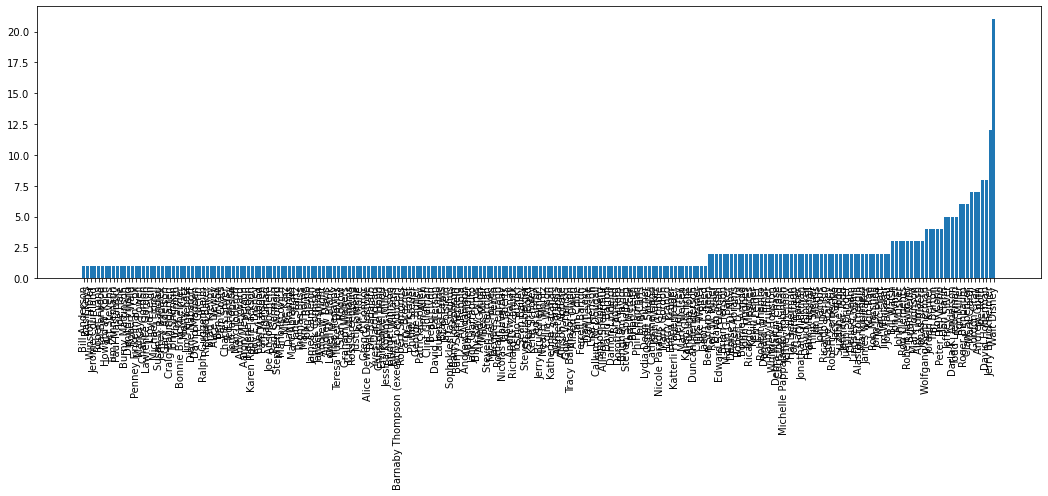

In [65]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(range(len(producers)), list(producers.values()))
plt.xticks(range(len(producers)), list(producers.keys()), rotation=90)
plt.show()

Most disney movies (21) are produced by Walt Disney.

In [66]:
music_by

{'Leigh Harline': 1,
 'Edward H. Plumb': 1,
 'Daniele Amfitheatrof': 1,
 'Paul Smith': 1,
 'Joseph S. Dubin': 1,
 "eorge Bruns (adapted from Tchaikovsky's Sleeping Beauty Ballet ": 1,
 'William Alwyn': 1,
 'Muir Mathieson': 1,
 'Victor Herbert': 1,
 'Mel Leven (new lyrics)': 1,
 'Richard M. Sherman (songs)': 1,
 'Robert B. Sherman (songs)': 1,
 'Irwin Kostal (score)': 1,
 'Artie Butler': 1,
 'John Barry': 1,
 'Harry Nilsson': 1,
 'Alex North': 1,
 'Buddy Baker': 1,
 'Pino Donaggio': 1,
 'David Shire': 1,
 'Elmer Bernstein': 1,
 'Henry Mancini': 1,
 'Basil Poledouris': 1,
 'Bruce Broughton': 1,
 'Miles Goodman': 1,
 'Nicholas Pike': 1,
 'Richard Gibbs': 1,
 'Mike Tavera': 1,
 'Jerry Goldsmith': 1,
 'Denis M. Hannigan': 1,
 'Michael Wandmacher': 1,
 'Joel McNeely (Score)': 1,
 'They Might Be Giants (Songs)': 1,
 'Christopher Young': 1,
 'William Ross': 1,
 'Carl Johnson': 1,
 'Carly Simon': 1,
 'Cliff Eidelman': 1,
 'Klaus Badelt': 1,
 'Rolfe Kent': 1,
 'Phil Collins': 1,
 'Trevor Jones'

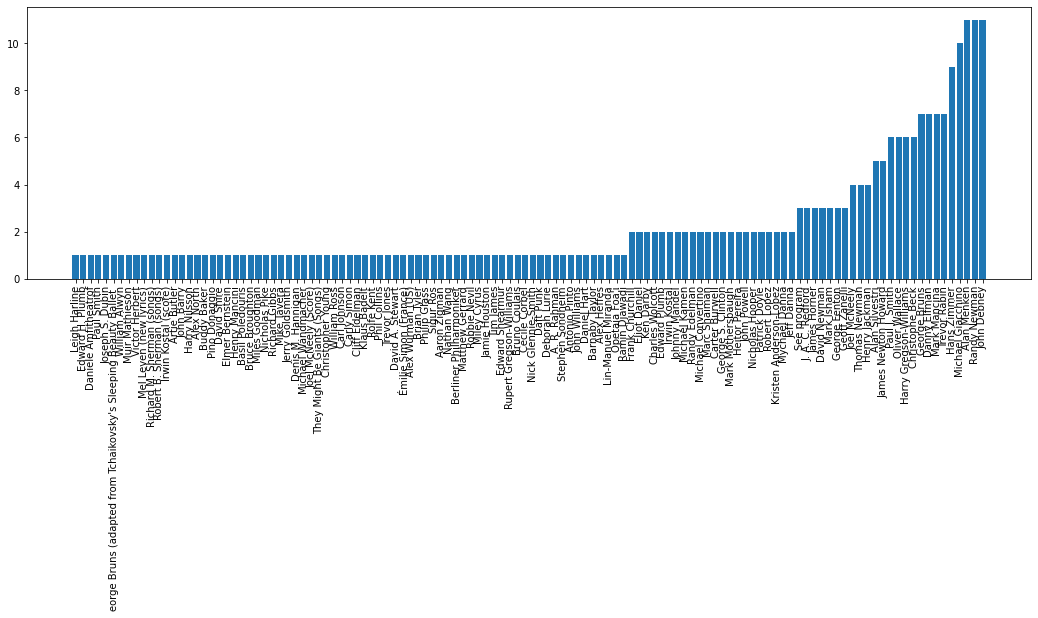

In [67]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(range(len(music_by)), list(music_by.values()))
plt.xticks(range(len(music_by)), list(music_by.keys()), rotation=90)
plt.show()

John Debney, Alan Menken, Randy Newman make music for most (11) disney movies.

In [68]:
distributed_by

{'Walt Disney Productions': 1,
 'Buena Vista Film Distribution': 1,
 'Paramount Pictures (North America)': 1,
 'Buena Vista International Distribution (International)': 1,
 'Paramount Pictures': 1,
 'Buena Vista International Distribution': 1,
 'PSO Productions (outside North America)': 1,
 'Trimark Pictures (International)': 1,
 'Guild Film Distribution': 1,
 'Ariane Films': 1,
 'Buena Vista International France': 1,
 'Entertainment Film Distributors (UK)': 1,
 'Buena Vista Pictures (US)': 1,
 'Summit Entertainment': 1,
 'Gaumount (France)': 1,
 'Lionsgate UK (United Kingdom)': 1,
 'Universum Film (Germany)': 1,
 'Walt Disney Studios Motion Pictures (United States)': 1,
 'Pathé Distribution': 1,
 'Toho': 1,
 'Mister Smith Entertainment': 1,
 'EMEA': 1,
 'Shanghai Media Group': 1,
 'Inc.': 2,
 'RKO Radio Pictures': 10,
 'Buena Vista Pictures Distribution': 21,
 'Walt Disney Studios Motion Pictures': 23,
 'Buena Vista Distribution': 24,
 'Walt Disney Studios': 60,
 'Motion Pictures': 60

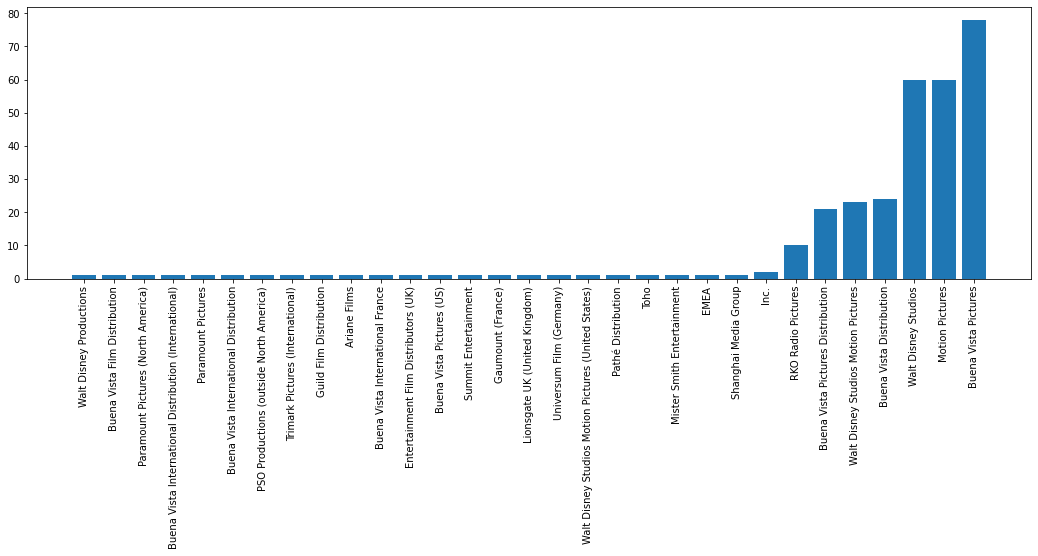

In [69]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(range(len(distributed_by)), list(distributed_by.values()))
plt.xticks(range(len(distributed_by)), list(distributed_by.keys()), rotation=90)
plt.show()

Most of the disney movies are distributed by Buena Vista Pictures.